# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statistics import stdev

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


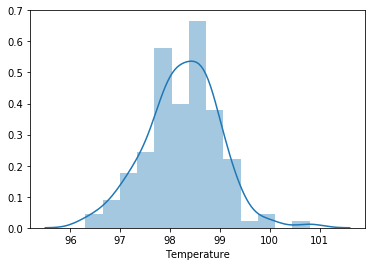

In [2]:
# Graphical checks for normality
_ = sns.distplot(df.temperature, axlabel='Temperature')

The histogram roughly follows the normal distribution, but we can check further. 

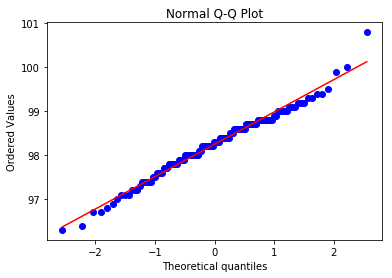

In [3]:
_ = stats.probplot(df.temperature, dist='norm', plot=plt)
_ = plt.title('Normal Q-Q Plot')
plt.show()

The linearity of the Q-Q plot shows that the body temperature data is normally distributed. 



Furthermore, we can do a statistical test to determine if the data is normal. We assume that the null hypothesis is that the body temperature data is normally distributed and the alternative hypothesis is that the data is not normally distributed. 

In [4]:
# Statistical test
s, p = stats.normaltest(df.temperature)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0.258748
The null hypothesis cannot be rejected


Since the null hypothesis cannot be rejected, we can say that the data is normally distributed. 

From the graphical displays and tests, we can say that the distribution of body temperature data is normal.

## 2. Is the sample size large? Are the observations independent?

In [5]:
# Check if the sample size is large enough
n = len(df.temperature)
n

130

Since n = 130 and n ≥ 30, the sample size is large.

To check if the observations are independent, we want to ensure that n ≤ 10% of the population. Given that the population is roughly 7.6 billion people we can check if our sample (n) is less than 10%.

We can say that the samples are independent because the temperature variable is not dependent on anything else.

## 3. Is the true population mean really 98.6 degrees F?


To test if the true population mean is really 98.6 degrees F, we will do a bootstraps hypothesis test.

Null hypothesis: the true mean body temperature is 98.6 degrees F

Alternative hypothesis: the true mean body temperature is not 98.6 degrees F

In [6]:
# Bootstrap hypothesis test
bs_replicates = np.empty(10000)
size = len(bs_replicates)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df.temperature, size = len(df.temperature)))
p_value = np.sum(bs_replicates >= 98.6)/size
print('bootstrap p value:\t', p_value)

bootstrap p value:	 0.0


The p value = 0, which is less than 0.05, indicates that the null hypothesis can be rejected and that the alternative hypothesis is true.

Next, we will do a frequentist statistical testing. We will choose a one-sample test because we are testing the one set of data against the population mean. Since n ≥ 30, we can use the z test statistic.


The null hypothesis is that the true mean body temperature is 98.6 degrees F

The alternative hypothesis is that the true mean body temperature is not 98.6 degrees F

In [7]:
# one sample z test
pop_mean = 98.6
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
z = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))
p = stats.norm.sf(abs(z))
if p <= 0.05: print('We can reject the null hypothesis')
print('p = ', p)

We can reject the null hypothesis
p =  2.1761575829410943e-08


In [8]:
print ('The sample mean is ', sample_mean)

The sample mean is  98.24923076923078


The sample mean is 98.2 which is significantly less than the population mean of 98.6 since the p-value is much smaller than the alpha value of 0.05. We can say that the true mean body temperature is not 98.6 degrees F because the p-value is very small, and thus statistically significant at a 95% confidence interval.

Next, a one-sample test using the t test statistic will be used.

The null hypothesis is that the true mean body temperature is 98.6 degrees F

The alternative hypothesis is that the true mean body temperature is not 98.6 degrees F

In [9]:
# one sample t test
t, p = stats.ttest_1samp(df.temperature, pop_mean)
[t,p]
if p <= 0.05: print('We can reject the null hypothesis')
print('p = ', p)

We can reject the null hypothesis
p =  2.4106320415561276e-07


Since we can reject the null hypothesis, we can say the true body temperature is not 98.6 degrees F. The p value determined from the t-test and the z-test are different, however both are small enough to reject the null hypothesis. The p value from the t-test is larger than that of the z-test, which indicates a slightly less confident statistic; however, still small enough to reject the null hypothesis.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [10]:
# sample n=10
n = np.random.choice(df.temperature, size=10)
print(n)

[98.7 97.4 98.4 97.5 97.1 99.  98.6 99.5 98.6 98.2]


In [11]:
# one sample z test
mean = np.mean(n)
std = np.std(n)
z = (mean - pop_mean)/(std/np.sqrt(len(n)))
p = stats.norm.sf(abs(z))
if p <= 0.05: print('We can reject the null hypothesis')
print('The sample mean is ', mean, 'and the p value is ', p)

The sample mean is  98.30000000000001 and the p value is  0.09373101630825004


The sample mean is 97.9 which is significantly less than the population mean of 98.6 since the p value is less than alpha.

In [12]:
# one sample t test
t, p = stats.ttest_1samp(n, 98.6)
[t,p]
if p <= 0.05: print('We can reject the null hypothesis')
print('p = ', p)

p =  0.2426561302412845


We should use the t test since the sample size is small (n ≤ 30). The p value from the t statistic is much larger than that of the z statistic. Since we don't know the sample standard deviation, there is a greater uncertainty with the t test, thus a more conservative p value. 

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [13]:
# Margin of error
z = 1.96
error = z * np.std(df.temperature)/np.sqrt(len(df.temperature))
print('Margin of error = ', error)

Margin of error =  0.125550964802579


In [14]:
# Confidence interval at 95%
ci = np.percentile(df.temperature, [2.5, 97.5])
print('Confidence interval = ', ci)

Confidence interval =  [96.7225 99.4775]


An abnormal temperature is one that is outside the 95% confidence interval. Thus, an abnormal temperature is less than 96.7 or greater than 99.5 degrees.

In [15]:
# Bootstrap approach
bs_replicates = np.empty(10000)
size = len(bs_replicates)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df.temperature, size = len(df.temperature)))
bs_ci = np.percentile(bs_replicates, [2.5, 97.5])
print('Bootstrap confidence interval:', bs_ci)

Bootstrap confidence interval: [98.12307692 98.37615385]


In [16]:
# One sample z test 
mean = np.mean(df.temperature)
std = np.std(df.temperature)
ci = stats.norm.interval(0.95, loc=mean, scale = std)
print(ci)

(96.81775582674824, 99.68070571171332)


From the one sample z test at a 95%, the abnormal body temperatures fall outside the confidence interval, thus temperatures less than 96.8 or greater than 99.7 degrees F are considered "abnormal". 

## 6. Is there a significant difference between males and females in normal temperature?

In [17]:
# two sample t test
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']
t, p = stats.ttest_ind(df_male.temperature, df_female.temperature)
[t,p]

[-2.2854345381656103, 0.02393188312239561]

Since the p-value < 0.05 we can reject the null hypothesis and say that the population mean of males and females are significantly different. 

## Conclusion

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. However, through statistical analysis it has been determined that the mean normal body temperature is not 98.6 degrees F. Additionally, there is a significant difference between the average male body temperature and average female body temperature. 